In [23]:
import numpy as np
import matplotlib.pyplot as plt



In [24]:
#read data.npy
data = np.load('data.npy')
x = data[0]
y = data[1]

In [25]:
print(data.shape)

(2, 100, 1)


In [26]:
print(x[0][0])

0.042828681417311144


In [27]:
print(x.shape)

(100, 1)


In [28]:
print(y.shape)

(100, 1)


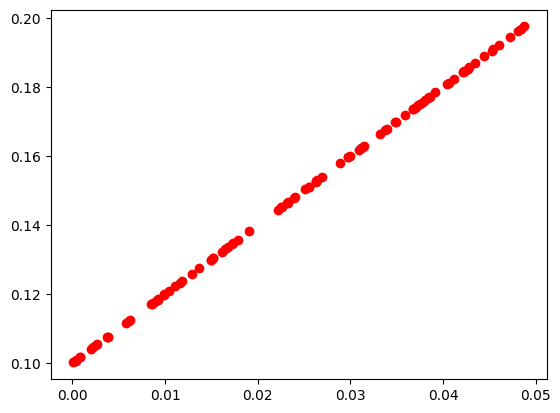

In [29]:
plt.plot(x, y, 'ro')

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Initialize weights and bias for a single-layer perceptron
input_dim = x.shape[1]  # Number of features
output_dim = 1  # We have one output (regression task)

# Weights and bias initialization (random values)
weights = np.random.randn(input_dim, output_dim) * 0.01
bias = np.zeros((1, output_dim))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Define training parameters
learning_rate = 0.1
epochs = 500000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = np.dot(x, weights) + bias  # Linear combination
    predictions = sigmoid(z)  # Sigmoid activation
    
    # Compute loss (Mean Squared Error)
    loss = np.mean((predictions - y) ** 2)
    
    # Backward pass
    d_loss = 2 * (predictions - y) / y.size  # Derivative of loss
    d_predictions = d_loss * sigmoid_derivative(predictions)  # Gradient of sigmoid

    # Update weights and bias using the gradients
    weights -= learning_rate * np.dot(x.T, d_predictions)
    bias -= learning_rate * np.sum(d_predictions, axis=0, keepdims=True)
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Final weights and biases
print("\nFinal Model Parameters:")
print("Weights:", weights)
print("Bias:", bias)

# Test the model
test_predictions = sigmoid(np.dot(x, weights) + bias)
print("\nPredictions (first 5 samples):", test_predictions[:5].flatten())


Epoch 500/500000, Loss: 0.0011163128684436787
Epoch 1000/500000, Loss: 0.0008422760387159432
Epoch 1500/500000, Loss: 0.0008336007081748167
Epoch 2000/500000, Loss: 0.0008327377115484178
Epoch 2500/500000, Loss: 0.0008321682737405424
Epoch 3000/500000, Loss: 0.0008316107002065452
Epoch 3500/500000, Loss: 0.0008310539508137176
Epoch 4000/500000, Loss: 0.0008304975888855162
Epoch 4500/500000, Loss: 0.0008299415969163896
Epoch 5000/500000, Loss: 0.0008293859739973436
Epoch 5500/500000, Loss: 0.0008288307198762222
Epoch 6000/500000, Loss: 0.000828275834326842
Epoch 6500/500000, Loss: 0.0008277213171241139
Epoch 7000/500000, Loss: 0.0008271671680430796
Epoch 7500/500000, Loss: 0.0008266133868588786
Epoch 8000/500000, Loss: 0.000826059973346746
Epoch 8500/500000, Loss: 0.0008255069272820152
Epoch 9000/500000, Loss: 0.0008249542484401166
Epoch 9500/500000, Loss: 0.0008244019365965767
Epoch 10000/500000, Loss: 0.0008238499915270204
Epoch 10500/500000, Loss: 0.0008232984130071689
Epoch 11000/50

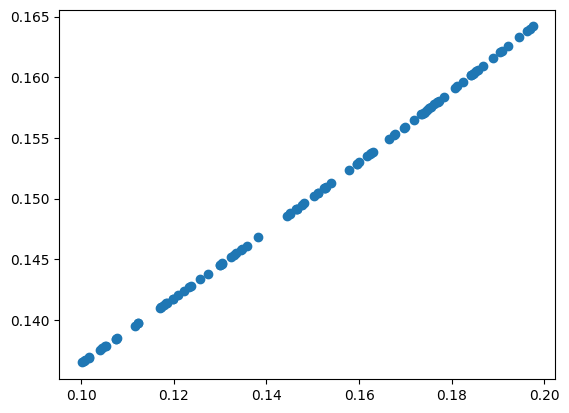

In [38]:
y_pred = sigmoid(weights * x + bias)
plt.plot(y, y_pred, 'o')

In [11]:
# Sigmoid aktivasyon fonksiyonunu tanımlayalım
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid'in türevini tanımlayalım
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Perceptron modelini eğitmek için gradyan inişiyle eğitim fonksiyonunu yazalım
def train_perceptron(x, y, lr=0.01, epochs=1000):
    # Veri boyutlarını alalım
    n_samples, n_features = x.shape
    
    # Ağırlık ve bias başlangıç değerlerini tanımlayalım
    weights = np.zeros((n_features, 1))
    bias = 0

    # Eğitim döngüsü
    for _ in range(epochs):
        # Doğrusal kombinasyon
        linear_output = np.dot(x, weights) + bias
        
        # Sigmoid aktivasyon fonksiyonu
        y_pred = sigmoid(linear_output)
        
        # Hata
        error = y_pred - y

        # Gradyanların hesaplanması
        d_weights = np.dot(x.T, error) / n_samples
        d_bias = np.sum(error) / n_samples

        # Ağırlık ve bias güncellemesi
        weights -= lr * d_weights
        bias -= lr * d_bias

    return weights, bias

# Perceptron modelini eğitelim
weights, bias = train_perceptron(x, y)

weights, bias


(array([[-0.03035299]]), np.float64(-1.4045613120803286))

In [12]:
# Tahmin fonksiyonunu tanımlayalım
def predict(x, weights, bias):
    linear_output = np.dot(x, weights) + bias
    y_pred = sigmoid(linear_output)
    return y_pred

# Modelin tahminlerini alalım
y_pred = predict(x, weights, bias)

# İlk 10 gerçek değer ve tahmin sonuçlarını karşılaştıralım
np.hstack((y[:10], y_pred[:10]))


array([[0.18565736, 0.19688766],
       [0.10170164, 0.19708921],
       [0.11798011, 0.19705012],
       [0.1629398 , 0.19694218],
       [0.10764505, 0.19707494],
       [0.12574556, 0.19703147],
       [0.1945486 , 0.19686632],
       [0.18078093, 0.19689936],
       [0.12738934, 0.19702753],
       [0.19751492, 0.19685921]])

In [13]:
# Ortalama kare hata (MSE) metrik fonksiyonunu tanımlayalım
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Modelin performansını değerlendirelim
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.0031227231425158806


In [14]:
import numpy as np

# Sigmoid ve türevi
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Çoklu perceptron modeli için eğitim fonksiyonu
def train_multi_perceptron(x, y, perceptron_num, lr=0.001, epochs=10000):
    n_samples, n_features = x.shape

    # Ağırlık ve bias değerlerini çoklu perceptron için başlat
    weights = np.zeros((n_features, perceptron_num))
    biases = np.zeros(perceptron_num)

    # Eğitim döngüsü
    for _ in range(epochs):
        # Doğrusal kombinasyon
        linear_output = np.dot(x, weights) + biases
        
        # Sigmoid aktivasyon fonksiyonu
        y_pred = sigmoid(linear_output)
        
        # Hata
        error = y_pred - y.reshape(-1, 1)

        # Gradyanlar
        d_weights = np.dot(x.T, error) / n_samples
        d_biases = np.sum(error, axis=0) / n_samples

        # Güncellemeler
        weights -= lr * d_weights
        biases -= lr * d_biases

    return weights, biases

# Örnek kullanım
perceptron_num = 1 # Örneğin 3 perceptron
weights_multi, biases_multi = train_multi_perceptron(x, y, perceptron_num)

print("Ağırlıklar:", weights_multi)
print("Biaslar:", biases_multi)


Ağırlıklar: [[-0.03034244]]
Biaslar: [-1.40413198]


In [15]:
# Tahmin fonksiyonunu tanımlayalım
def predict(x, weights, bias):
    linear_output = np.dot(x, weights) + bias
    y_pred = sigmoid(linear_output)
    return y_pred

# Modelin tahminlerini alalım
y_pred = predict(x, weights_multi, biases_multi)

# İlk 10 gerçek değer ve tahmin sonuçlarını karşılaştıralım
np.hstack((y[:10], y_pred[:10]))


array([[0.18565736, 0.19695563],
       [0.10170164, 0.19715716],
       [0.11798011, 0.19711807],
       [0.1629398 , 0.19701015],
       [0.10764505, 0.19714289],
       [0.12574556, 0.19709943],
       [0.1945486 , 0.19693429],
       [0.18078093, 0.19696733],
       [0.12738934, 0.19709548],
       [0.19751492, 0.19692718]])

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Perceptron Model
class MultiPerceptron(nn.Module):
    def __init__(self, input_dim, perceptron_num):
        super(MultiPerceptron, self).__init__()
        self.linear = nn.Linear(input_dim, perceptron_num)  # Single layer perceptron
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation

# Model parameters
input_dim = x.shape[1]  # Number of features
perceptron_num = 1  # Number of perceptrons
model = MultiPerceptron(input_dim, perceptron_num)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("Predictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.09483984857797623
Epoch 1000/5000, Loss: 0.07936084270477295
Epoch 1500/5000, Loss: 0.07108421623706818
Epoch 2000/5000, Loss: 0.06496080756187439
Epoch 2500/5000, Loss: 0.05968732759356499
Epoch 3000/5000, Loss: 0.05495698004961014
Epoch 3500/5000, Loss: 0.05067704990506172
Epoch 4000/5000, Loss: 0.04679833725094795
Epoch 4500/5000, Loss: 0.0432816743850708
Epoch 5000/5000, Loss: 0.04009173810482025
linear.weight: tensor([[1.3441]])
linear.bias: tensor([-0.5746])
Predictions (first 5 samples): [[0.6469772 ]
 [0.36512163]
 [0.41860956]
 [0.5725273 ]
 [0.38434267]]


In [17]:
# Testing the model with test data
def test_model(model, x_test, y_test):
    # Ensure model is in evaluation mode
    model.eval()
    
    # Convert test data to tensors
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    
    # Make predictions
    with torch.no_grad():
        predictions = model(x_test_tensor)
    
    # Calculate Mean Squared Error (MSE) as a test metric
    mse_loss = nn.MSELoss()
    test_loss = mse_loss(predictions, y_test_tensor)
    
    print(f"Test MSE Loss: {test_loss.item()}")
    
    # Print some sample predictions and ground truth
    print("Sample Predictions:", predictions[:5].numpy().flatten())
    print("Ground Truth:", y_test[:5].flatten())

# Split the original data into train and test sets
from sklearn.model_selection import train_test_split

# Split 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Retrain the model on the training data
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Update the training loop to work with train split
model = MultiPerceptron(input_dim, perceptron_num)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    predictions = model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Test the model with the test dataset
test_model(model, x_test, y_test)


Test MSE Loss: 0.03193169832229614
Sample Predictions: [0.41304183 0.6064033  0.5490542  0.44540557 0.5657118 ]
Ground Truth: [0.22663843 0.69246365 0.55254882 0.3051968  0.59269006]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Ideal Fit")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 64)  # Input layer to hidden layer 1 (64 neurons)
        self.fc2 = nn.Linear(64, 1)        # Hidden layer 1 to hidden layer 2 (32 neurons)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))         # Apply ReLU activation for hidden layers
        x = self.activation(self.fc2(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.0010727650951594114
Epoch 1000/5000, Loss: 0.0009062051540240645
Epoch 1500/5000, Loss: 0.0008576879627071321
Epoch 2000/5000, Loss: 0.0008078207029029727
Epoch 2500/5000, Loss: 0.0007371429819613695
Epoch 3000/5000, Loss: 0.00066039664670825
Epoch 3500/5000, Loss: 0.0005985273746773601
Epoch 4000/5000, Loss: 0.0005574926035478711
Epoch 4500/5000, Loss: 0.0005344526725821197
Epoch 5000/5000, Loss: 0.0005228139343671501

Final Model Parameters:
fc1.weight: tensor([[-0.2634],
        [ 0.4260],
        [-0.0825],
        [ 0.6017],
        [-0.9822],
        [ 0.2754],
        [-0.3575],
        [-1.9113],
        [ 0.5559],
        [-0.4168],
        [-0.2150],
        [-0.3039],
        [ 0.0850],
        [-0.3185],
        [ 0.7339],
        [ 0.5972],
        [ 0.1359],
        [-0.8848],
        [ 0.1725],
        [ 0.0629],
        [-0.0315],
        [ 0.9488],
        [-0.1103],
        [-0.7966],
        [ 0.8727],
        [-0.2141],
        [-0.5446],
   

Model Performance on Training Data:
Mean Squared Error (MSE): 0.0005
R-squared (R²): 0.9940


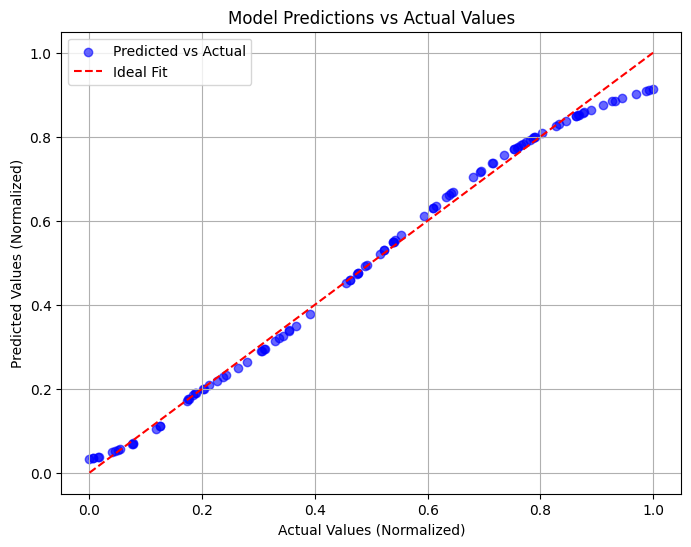

Prediction for first sample: 0.8579
Actual value for first sample: 0.8782


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Ideal Fit")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 1)  # Input layer to hidden layer 1 (64 neurons)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = self.activation(self.fc1(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.10144849121570587
Epoch 1000/5000, Loss: 0.04995446279644966
Epoch 1500/5000, Loss: 0.024255460128188133
Epoch 2000/5000, Loss: 0.011932956986129284
Epoch 2500/5000, Loss: 0.0060476092621684074
Epoch 3000/5000, Loss: 0.00325421872548759
Epoch 3500/5000, Loss: 0.0019635832868516445
Epoch 4000/5000, Loss: 0.001400212524458766
Epoch 4500/5000, Loss: 0.0011747534153982997
Epoch 5000/5000, Loss: 0.001091422513127327

Final Model Parameters:
fc1.weight: tensor([[-2.0797]])
fc1.bias: tensor([-1.6565])

Predictions (first 5 samples): [[0.14860943]
 [0.15999748]
 [0.15773554]
 [0.15162322]
 [0.1591686 ]]


Model Performance on Training Data:
Mean Squared Error (MSE): 0.0011
R-squared (R²): -0.3117


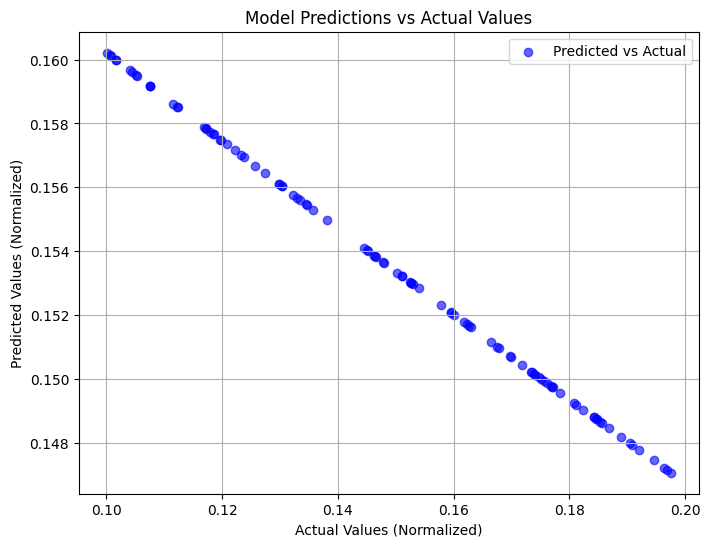

Prediction for first sample: 0.1486
Actual value for first sample: 0.1857


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")


In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Initialize weights and bias for a single-layer perceptron
input_dim = x.shape[1]  # Number of features
output_dim = 1  # We have one output (regression task)

# Weights and bias initialization (random values)
weights = np.random.randn(input_dim, output_dim) * 0.01
bias = np.zeros((1, output_dim))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Define training parameters
learning_rate = 0.01
epochs = 500000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = np.dot(x, weights) + bias  # Linear combination
    predictions = sigmoid(z)  # Sigmoid activation
    
    # Compute loss (Mean Squared Error)
    loss = np.mean((predictions - y) ** 2)
    
    # Backward pass
    d_loss = 2 * (predictions - y) / y.size  # Derivative of loss
    d_predictions = d_loss * sigmoid_derivative(predictions)  # Gradient of sigmoid

    # Update weights and bias using the gradients
    weights -= learning_rate * np.dot(x.T, d_predictions)
    bias -= learning_rate * np.sum(d_predictions, axis=0, keepdims=True)
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Final weights and biases
print("\nFinal Model Parameters:")
print("Weights:", weights)
print("Bias:", bias)

# Test the model
test_predictions = sigmoid(np.dot(x, weights) + bias)
print("\nPredictions (first 5 samples):", test_predictions[:5].flatten())


Epoch 500/500000, Loss: 0.07904617817595914
Epoch 1000/500000, Loss: 0.07237881845933264
Epoch 1500/500000, Loss: 0.0664719182892493
Epoch 2000/500000, Loss: 0.061127948601580606
Epoch 2500/500000, Loss: 0.0562782790928099
Epoch 3000/500000, Loss: 0.051878306070901846
Epoch 3500/500000, Loss: 0.047888193958659064
Epoch 4000/500000, Loss: 0.04427017911130616
Epoch 4500/500000, Loss: 0.040988659526926964
Epoch 5000/500000, Loss: 0.03801053015654235
Epoch 5500/500000, Loss: 0.035305375016774276
Epoch 6000/500000, Loss: 0.03284550701013092
Epoch 6500/500000, Loss: 0.030605898620648907
Epoch 7000/500000, Loss: 0.02856404342713488
Epoch 7500/500000, Loss: 0.026699778327011436
Epoch 8000/500000, Loss: 0.02499508747010601
Epoch 8500/500000, Loss: 0.023433902064726467
Epoch 9000/500000, Loss: 0.022001905193695968
Epoch 9500/500000, Loss: 0.020686347186863515
Epoch 10000/500000, Loss: 0.01947587459481243
Epoch 10500/500000, Loss: 0.01836037411297129
Epoch 11000/500000, Loss: 0.01733083169335287


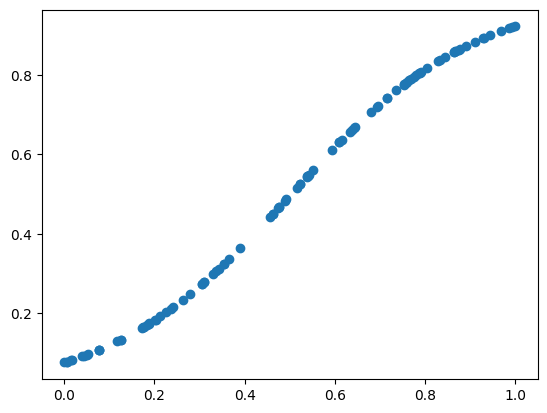